In [1]:
import pandas as pd

ksi_df = pd.read_csv("data/KSI.csv")  # Adjust filename as needed

/Users/achchala/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [ ]:
import geopandas as gpd
x
ksi_gdf = gpd.read_file("data/KSI.geojson")  # or .shp


In [3]:
from shapely.geometry import Point
import geopandas as gpd

# Drop missing coordinates
ksi_df = ksi_df.dropna(subset=['LATITUDE', 'LONGITUDE'])

# Combine into geometry
geometry = [Point(xy) for xy in zip(ksi_df['LONGITUDE'], ksi_df['LATITUDE'])]
ksi_gdf = gpd.GeoDataFrame(ksi_df, geometry=geometry, crs='EPSG:4326')

In [6]:
# Step 3: Parse full datetime string from 'DATE' column
ksi_df['DATETIME'] = pd.to_datetime(ksi_df['DATE'], format="%m/%d/%Y %I:%M:%S %p", errors='coerce')

# Drop failed parses (NaT)
ksi_df = ksi_df.dropna(subset=['DATETIME'])

# Extract features
ksi_df['hour'] = ksi_df['DATETIME'].dt.hour
ksi_df['weekday'] = ksi_df['DATETIME'].dt.dayofweek
ksi_df['month'] = ksi_df['DATETIME'].dt.month
ksi_df['year'] = ksi_df['DATETIME'].dt.year
ksi_df['weekday_name'] = ksi_df['weekday'].map({0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'})

# Preview
ksi_df[['DATE', 'DATETIME', 'hour', 'weekday_name', 'month', 'year']].head()

,DATE,DATETIME,hour,weekday_name,month,year
0,1/1/2006 10:00:00 AM,2006-01-01 10:00:00,10,Sun,1,2006
1,1/1/2006 10:00:00 AM,2006-01-01 10:00:00,10,Sun,1,2006
2,1/1/2006 10:00:00 AM,2006-01-01 10:00:00,10,Sun,1,2006
3,1/1/2006 10:00:00 AM,2006-01-01 10:00:00,10,Sun,1,2006
4,1/1/2006 10:00:00 AM,2006-01-01 10:00:00,10,Sun,1,2006


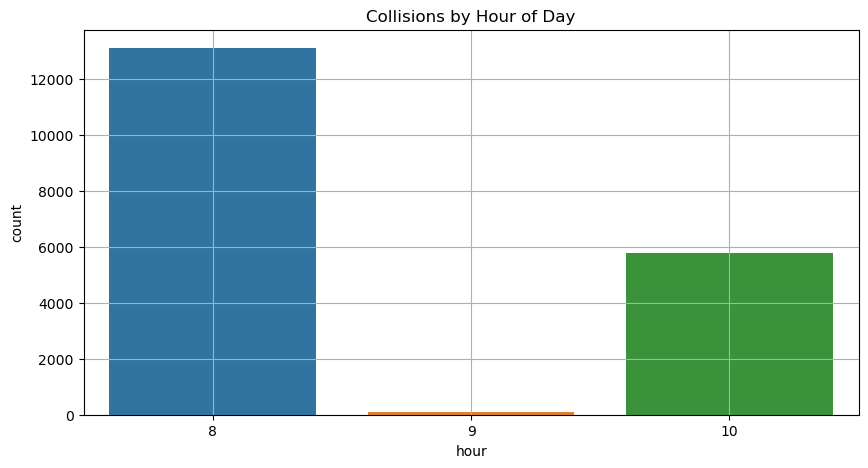

In [7]:
# Step 4: Visualize collisions by hour
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(x='hour', data=ksi_df)
plt.title("Collisions by Hour of Day")
plt.grid(True)
plt.show()

In [8]:
print(ksi_df['DATE'].head(5))
print(ksi_df['DATETIME'].head(5))
print(ksi_df['hour'].value_counts().sort_index())

0    1/1/2006 10:00:00 AM
1    1/1/2006 10:00:00 AM
2    1/1/2006 10:00:00 AM
3    1/1/2006 10:00:00 AM
4    1/1/2006 10:00:00 AM
Name: DATE, dtype: object
0   2006-01-01 10:00:00
1   2006-01-01 10:00:00
2   2006-01-01 10:00:00
3   2006-01-01 10:00:00
4   2006-01-01 10:00:00
Name: DATETIME, dtype: datetime64[ns]
hour
8     13093
9       102
10     5762
Name: count, dtype: int64
